In [1]:
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:
yf.pdr_override()

In [3]:
sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,46620.242188,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,47249.031250,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,45721.964844,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,46350.757812,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,46081.277344,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,45003.355469,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,44194.910156,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,44778.789062,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,44374.570312,10365440


In [5]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-09-20,296.329987,298.720001,289.519989,294.299988,294.299988
2021-09-21,295.690002,297.540009,294.070007,294.799988,294.799988
2021-09-22,296.730011,300.220001,294.510010,298.579987,298.579987
2021-09-23,298.850006,300.899994,297.529999,299.559998,299.559998
2021-09-24,298.230011,299.799988,296.929993,299.350006,299.350006


In [6]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13',
               '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17',
               '2021-09-23', '2021-09-24'],
              dtype='datetime64[ns]', name='Date', length=833, freq=None)

In [7]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
import matplotlib.pyplot as plt

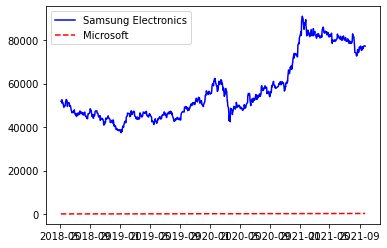

In [9]:
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

In [10]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [11]:
sec_dpc.iloc[0] = 0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

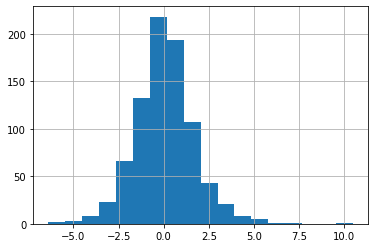

In [13]:
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [14]:
sec_dpc.describe()

count    833.000000
mean       0.061891
std        1.681561
min       -6.387665
25%       -0.965018
50%        0.000000
75%        0.997783
max       10.470588
Name: Close, dtype: float64

In [15]:
sec_dpc_cs = sec_dpc.cumsum() # 일간 변동률의 누적합을 구한다.
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-09-15    51.148634
2021-09-16    49.979803
2021-09-17    51.425269
2021-09-23    51.684337
2021-09-24    51.555138
Name: Close, Length: 833, dtype: float64

In [16]:
msft_dpc = (msft['Close'] / msft['Close'].shift(1) - 1) * 100
msft_dpc.iloc[0] = 0
msft_dpc.head()

Date
2018-05-03    0.000000
2018-05-04    1.158716
2018-05-07    1.113911
2018-05-08   -0.426111
2018-05-09    1.179423
Name: Close, dtype: float64

In [18]:
msft_dpc_cs = msft_dpc.cumsum()
msft_dpc_cs.head()

Date
2018-05-03    0.000000
2018-05-04    1.158716
2018-05-07    2.272627
2018-05-08    1.846516
2018-05-09    3.025939
Name: Close, dtype: float64

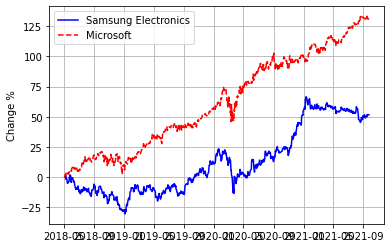

In [20]:
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## KOSPI MDD 구하기

- 1년 동안의 최댓값과 최솟값을 구하여 MDD를 계산한다.

In [23]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

[*********************100%***********************]  1 of 1 completed


In [25]:
window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close'] / peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

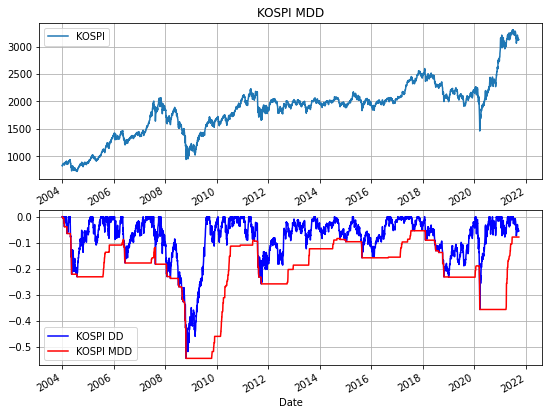

In [26]:
plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [27]:
max_dd.min()

-0.5453665130144085

In [30]:
max_dd[max_dd == -0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

# 회귀분석과 상관관계

In [13]:
import pandas as pd

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf

In [2]:
yf.pdr_override()

In [3]:
dow = pdr.get_data_yahoo('^DJI', start='2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', start='2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
import matplotlib.pyplot as plt

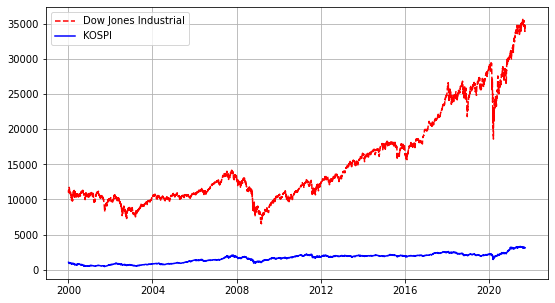

In [6]:
plt.figure(figsize=(9, 5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

- 지수 기준값이 달라서, 어느 지수가 더 좋은 성과를 냈는지 알 수 없다.
- 이런 경우 현재 종가를 특정시점의 종가로 나누어서 변동률을 구하여 확인할 수 있다.

## 지수화 비교

In [7]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

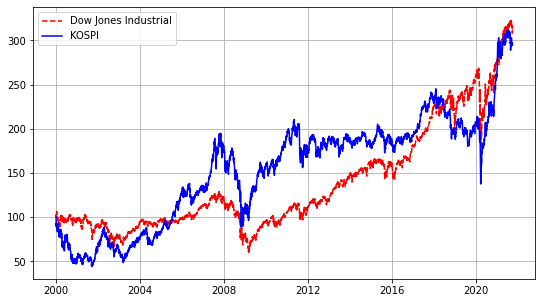

In [10]:
plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

- 지난 21년간 KOSPI의 상승률이 다우존스 지수의 상승률과 엇비슷했음을 알 수 있다.

## 산점도 분석

- x : 다우존스 지수, y : 코스피 지수

In [11]:
print(len(dow), len(kospi))

5468 5355


In [14]:
df = pd.DataFrame({'DOW': dow.Close, 'KOSPI': kospi.Close})
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,NaN
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2021-09-20,33970.468750,NaN
2021-09-21,33919.839844,NaN
2021-09-22,34258.320312,NaN


In [23]:
df = df.fillna(method='ffill').fillna(method='bfill')

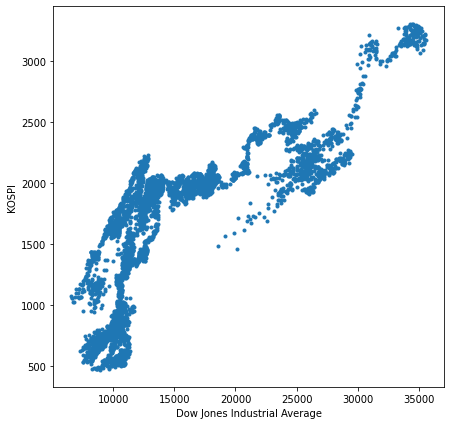

In [24]:
plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker=".")
plt.xlabel("Dow Jones Industrial Average")
plt.ylabel("KOSPI")
plt.show()

- 어느 정도 상관성은 있어보이나, 위 산점도만 가지고는 알 수 없다.
- 선형 회귀분석을 통해, 더 정확하게 분석해보자.

## 선형회귀분석

- `scipy`의 `stats`를 활용하여 선형 회귀분석 수행

In [25]:
from scipy import stats

In [26]:
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07856365684632188, intercept=436.0128266732547, rvalue=0.8089050604938535, pvalue=0.0, stderr=0.0007609635489927699, intercept_stderr=12.682042736476463)

## 상관계수에 따른 리스크 완화

In [27]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.808905
KOSPI,0.808905,1.000000


In [31]:
r_value = df['DOW'].corr(df['KOSPI'])
r_squared = r_value ** 2

In [33]:
print("Correlation between DOW and KOSPI :", r_value)
print("R-squared between DOW and KOSPI :", r_squared)

Correlation between DOW and KOSPI : 0.8089050604938535
R-squared between DOW and KOSPI : 0.6543273968925647


In [34]:
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

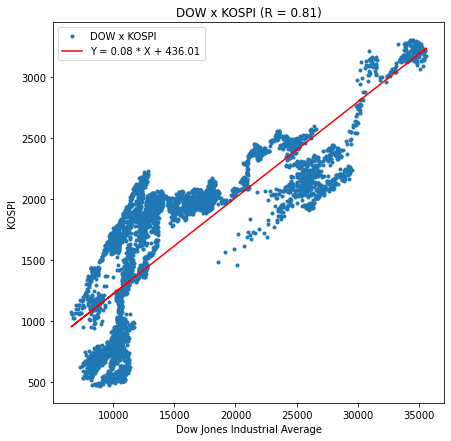

In [37]:
plt.figure(figsize=(7, 7))
plt.plot(df['DOW'], df['KOSPI'], '.')
plt.plot(df['DOW'], regr.slope * df['DOW'] + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel("Dow Jones Industrial Average")
plt.ylabel("KOSPI")
plt.show()

- 상관계수가 0.81 이므로 약간의 리스크 완화 효과는 존재한다.

## 상관계수에 따른 리스크 완화

- 현대 포트폴리오 이론(Modern Portfolio Theory by 해리 마코위츠) : __상관관계가 낮은 자산을 대상으로 분산 투자하면 위험을 감소시킬 수 있다.__
- 대표적인 예 : 주식과 채권은 낮은 상관관계를 갖는다.
- 상관계수에 따른 리스크 완화효과
    + +1.0 : 리스크 완화효과 없음
    + +0.5 : 중간 정도의 리스크 완화효과 있음
    + 0 : 상당한 리스크 완화효과 있음
    + -0.5 : 대부분의 리스크를 제거함
    + -1.0 : 모든 리스크 제거함